<a href="https://colab.research.google.com/github/daria-pavlova/python_for_ds_tasks/blob/main/module_2.1/hw_2_1_2_feature_analysis_for_building_linear_regression_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
import pandas as pd
import numpy as np

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
medical_df = pd.read_csv('/content/drive/MyDrive/Educational/Machine Learning for people/Module 2.1 Linear regression/data/medical-charges.csv')


**Завдання 1**: Завантажте дані `medical-charges.csv` в пандас датафрейм і виведіть перші 5 записів. Напишіть, як ви можете підійти до вирішення задачі прогнозування колонки `charges` на основі інших колонок виходячи з наявних на даний момент знань (без ML методів, чисто з використанням аналітики). Запишіть 3 або більше ідей, які приходять вам на думку нижче:

In [4]:
medical_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Аналітично, щоб зпрогназувати колонку charges ми можемо:
1. Подивитись кореляцію між charges та іншими колнками як age, bmi, smoker і визначити які мають найсильніший вплив на колонку charges.
2. Визначити які категоріальні змінні є статистично значущими.
3. Розділити дані на категорії та визначити, які фактори найбільше впливають на вартість медичних послуг.

**Завдання 2**: Візуалізуйте розподіл медичних зборів (`charges`) у вигляді інтерактивної гістограми plotly з розбиттями за категоріями ознак
1. `sex`
2. `region`

Додайте маржинальний графік у вигляді бокс-плота вгорі по дикретним категоріям ознак.
Скористайтесь прикладом візуалізації з лекції.
Опишіть свої спостереження.

In [6]:
!pip install plotly matplotlib seaborn --quiet

In [7]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
%matplotlib inline

In [17]:
fig = px.histogram(medical_df,
                   x='sex',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Sex')
fig.update_layout(bargap=0.1)
fig.show()

In [13]:
fig = px.histogram(medical_df,
                   x='region',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Region')
fig.update_layout(bargap=0.1)
fig.show()

In [15]:
fig = px.histogram(medical_df,
                   x='charges',
                   color='sex',
                   facet_row='region',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Medical Charges by Sex and Region')
fig.update_layout(bargap=0.1)
fig.show()

**Завдання 3**: Візуалізуйте з `plotly` розподіл кожного з настуних стовпців відносно того, чи є людина курцем (`smoker`)
- `region`
- `children`

та опишіть коротко свої спостереження.

In [19]:
fig = px.histogram(medical_df,
                   x='smoker',
                   color='children',
                   facet_row='region',
                   marginal='box',
                   nbins=47,
                   title='Distribution of Smokers by Number of Children and Region')
fig.update_layout(bargap=0.1)
fig.show()

**Завдання 4**: Візуалізуйте звʼязок між стовпцем `charges` та `children` використовуючи графіки-скрипки (`px.violin`). Опишіть свої спостереження.

In [23]:
fig = px.violin(medical_df,
                x="children",
                y="charges",
                box=True,
                title="Relationship between Medical Charges and Number of Children")
fig.show()

1. На результуючому графіку можемо побачити, що щільнішу дистрибуцію значень мають люди з 5 дітьми озираючись на товщину скрипки.
2. Також люди з 5 дітьми зазвичай сплачують менші медичні рахунки аніж люди з 1, 2, 3 та 4 дітьми. Де видно по мідані коробочки усередині скрипки.
3.  Середнє значення медичних витрат у людей з 2 дітьми найбільше судячи по середньому значенню.
4. У 2 людей без дітей найвищі медичні витрати (скоріш за все не повʼязані з кореляцією дітей).

Завдання 5. Розглянемо модель для користувачів, які не є курцями (no_smoker_df):

𝑐ℎ𝑎𝑟𝑔𝑒𝑠=𝑤×𝑎𝑔𝑒+𝑏

Спробуйте 3 різні пари параметрів w та b аби вручну підігнати лінію під дані використовуючи наведені допоміжні функції estimate_charges та try_parameters. Опишіть спостереження. Пари параметрів мають бути НЕ такі, як були наведені в лекції.

In [41]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
df = non_smoker_df

In [42]:
def estimate_charges(age, w, b):
    return w * age + b

In [43]:
def try_parameters(df, w, b):
    ages = df.age
    target = df.charges

    estimated_charges = estimate_charges(ages, w, b)

    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);
    plt.show()

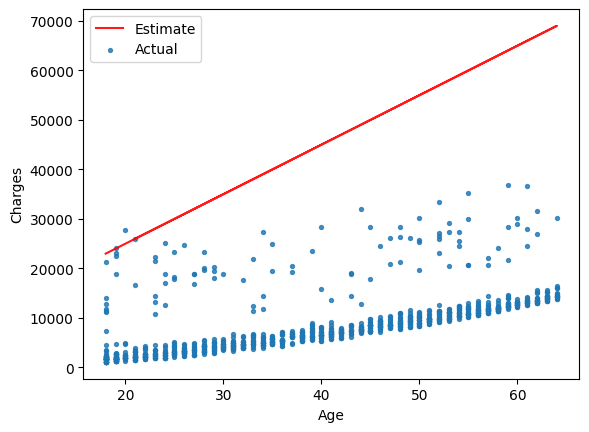

In [44]:
try_parameters(df, 1000, 5000)

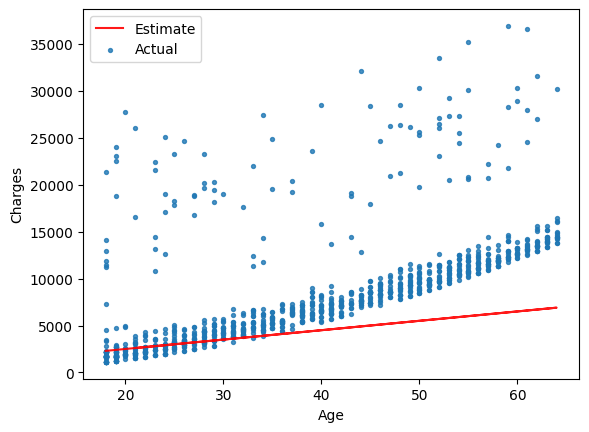

In [45]:
try_parameters(df, 100, 500)

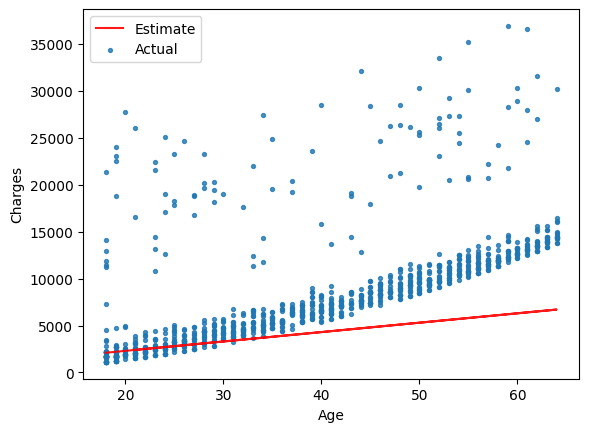

In [57]:
try_parameters(df, 100, 300)

**Завдання 6**: Напишіть фукнцію для обчислення root mean squared error згідно з формулою цієї метрики точності моделі з використанням `numpy`.

Обчисліть RMSE для тих пар пареметрів, які Ви спробували в завданні 5.

Яке найнижче значення втрат ви зможете досягти? Чи можете ви придумати загальну стратегію для знаходження кращих значень $w$ та $b$ методом проб та помилок?

In [59]:
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [61]:
w = 1000
b = 5000

In [63]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [64]:
rmse(targets, predicted)

37691.022198824525

Для пар чисел 1000 і 5000 можемо інтерпретувати, що кожен елемент у прогнозі відрізняється від фактичної цілі на $37691.

In [65]:
w = 100
b = 500

In [66]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [67]:
rmse(targets, predicted)

6576.299390690054

Для пар чисел 100 і 500 можемо інтерпретувати, що кожен елемент у прогнозі відрізняється від фактичної цілі на $6576.

In [68]:
w = 100
b = 300

In [69]:
targets = non_smoker_df['charges']
predicted = estimate_charges(non_smoker_df.age, w, b)

In [70]:
rmse(targets, predicted)

6699.702042725354

Для пар чисел 100 і 300 можемо інтерпретувати, що кожен елемент у прогнозі відрізняється від фактичної цілі на $6699.7.

Щоб покращити значення втрат можемо проаналізувати, як покращуються результати при зміні параметрів. І повторенням визначити найкращий варіант.